In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_models = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/ensemble_2809"
path_metrics = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/ensemble_2809_log_files"

***
# Examinate the Loss :

In [3]:
def make_table(log_file) :
    import pandas as pd
    lines_data = [line for line in open(log_file).read().split("\n") if line[0:6] == "Epoch:" if len(line.split("\t")) == 6] # if len(line.split("\t")) == 6*
    lines_split = [line.split("\t") for line in lines_data]
    df_raw = pd.DataFrame(lines_split , columns = ["Epoch","Train_loss","Test_loss","MCC","AUC","Acc"])
    df = df_raw.applymap(lambda x: float(x.split(":")[1]))
    df.set_index("Epoch", inplace = True)
    return df
    
def plot_loss(df) : 
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Train_loss'], label='train loss', marker='o', linestyle='-', color ="red")
    plt.plot(df.index, df['Test_loss'], label='test loss', marker='s', linestyle='--', color = "blue")
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)   
    plt.show()  
    

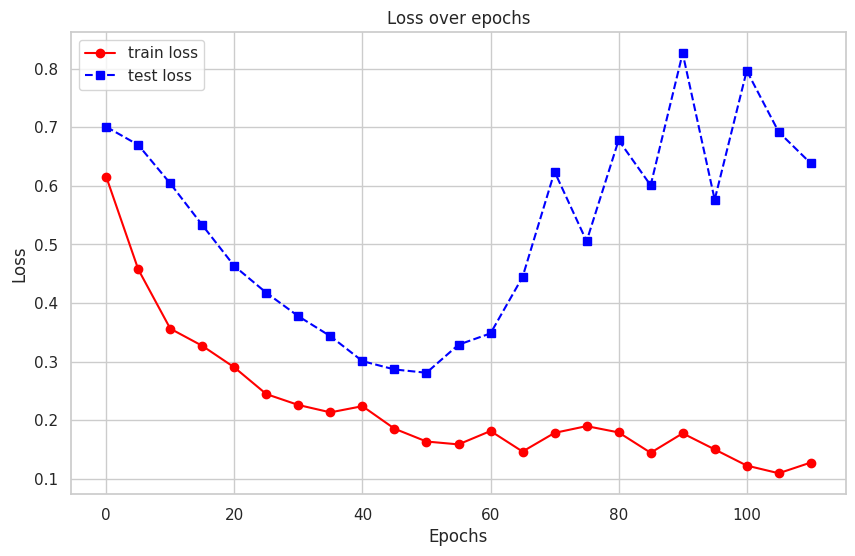

In [8]:
eg_df = make_table(f"{path_metrics}/KL63__node_classification.2805.log")
plot_loss(eg_df)

***
# Make clean table : 

In [5]:
metrics_names = ["KL_type" , "n_prophages", "F1_score", "precision" , "recall", "MCC", "Accuracy", "AUC"]
df_metrics = pd.read_csv(f"{path_models}/Metric_Report.2809.tsv", sep = "\t", names = metrics_names)

df_metrics_sorted = df_metrics.sort_values(by='KL_type')
df_metrics_sorted.reset_index(drop=True, inplace=True)


In [7]:
df_metrics_sorted = df_metrics.sort_values(by='KL_type', key=lambda x: x.str.split("KL").str[1].astype(int))

df_metrics_sorted

,KL_type,n_prophages,F1_score,precision,recall,MCC,Accuracy,AUC
31,KL1,166,0.592593,0.727273,0.500000,0.543305,0.888889,0.908886
0,KL2,364,0.831169,0.780488,0.888889,0.797622,0.940367,0.932234
33,KL3,127,0.342857,0.206897,1.000000,0.236282,0.386667,1.000000
61,KL5,23,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
15,KL7,36,0.571429,0.500000,0.666667,0.495074,0.857143,0.722222
...,...,...,...,...,...,...,...,...
58,KL136,32,0.571429,0.500000,0.666667,0.484481,0.842105,0.854167
46,KL145,28,0.363636,0.222222,1.000000,0.333333,0.562500,1.000000
54,KL149,64,0.714286,0.625000,0.833333,0.661503,0.894737,0.947917
32,KL151,45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
for col in df_metrics_sorted.columns : 
    if col not in ["KL_type","n_prophages"] : 
        df_metrics_sorted[col] = round(df_metrics_sorted[col] , 4)

In [9]:
df_metrics_sorted.to_csv(f"{path_models}/Metric_Report.1411.clean.tsv", sep = "\t", index = False, )

***
#

In [10]:
path_work = "/media/concha-eloko/Linux/PPT_clean"
#path_work = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"

    # Open the DF
DF_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df.tsv", sep = "\t" ,  header = 0)

# Ambiguous ones :
# level 0 :
DF_info_lvl_0 = DF_info[~DF_info["KL_type_LCA"].str.contains("\\|")]
DF_info_lvl_0 = DF_info_lvl_0.drop_duplicates(subset = ["Infected_ancestor","index","prophage_id"] , keep = "first").reset_index(drop=True)
dico_prophage_kltype = {row["Phage"]:row["KL_type_LCA"] for _,row in DF_info_lvl_0.drop_duplicates(subset = ["Phage"]).iterrows()}


In [11]:
DF_info_lvl_0

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,1,2,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,prophage_id
0,GCF_016651625.1__phage29,GCF_016651625.1__phage29__142,KL43,GCF_016651625.1,ppt__1,ppt,MSVPNQTPYNIYTANGLTTVFTYEFYIISASDLRVSINGDVVTSGY...,KDFVNINDYWFPTDGDDFYPALNKALSVSPHVLIPPGKHYLKSTVS...,-0.018416,0.022387,...,0.004437,0.087907,0.015800,0.025778,0.065790,0.034045,-0.070899,0.016068,0.065339,prophage_12186
1,GCF_016651625.1__phage29,GCF_016651625.1__phage29__150,KL43,GCF_016651625.1,anubis__0,anubis,MRANLIKTNFTAGEISPRLMGRVDIARYANGAKIIENAVCVVQGGV...,QAASPGAWTREDTVWTEEFGYPGAVTLYQQRLVLAGSPQYPQTIWW...,0.036016,0.005938,...,-0.037612,0.008772,0.010556,-0.049738,-0.012549,0.092624,-0.136602,-0.191378,0.135658,prophage_12186
2,GCF_016651625.1__phage12,GCF_016651625.1__phage12__59,KL43,GCF_016651625.1,ppt__4,ppt,MSISKRNFLKAVSCAYFFYSFKALTKVNQPIEDYISTKDKNTWPSK...,NTWPSKVHRVEEFYTSTDRDYSDAILRGINYCSLNNCVLFFSDKYK...,0.026004,0.024372,...,-0.026018,0.018206,0.036751,-0.032549,0.064112,0.061520,-0.024423,-0.027998,0.028089,prophage_924
3,GCF_019928025.1__phage0,GCF_019928025.1__phage0__10,KL43,n1471,ppt__4,ppt,MSISKRNFLKAVSCAYFFYSFKALTKVNQPIEDYISTKDKNTWPSK...,NTWPSKVHRVEEFYTSTDRDYSDAILRGINYCSLNNCVLFFSDKYK...,0.026004,0.024372,...,-0.026018,0.018206,0.036751,-0.032549,0.064112,0.061520,-0.024423,-0.027998,0.028089,prophage_2929
4,GCF_004313505.1__phage4,GCF_004313505.1__phage4__113,KL14,GCF_004313505.1,anubis__5,anubis,MSEYDTGNPVPSASMPDAWDNMQSIDKFVNSSDETITTRTGQQLDT...,KAIFDAWLDFGIDWNGNESISLQLQTAVNYVSKLPYGGEIVLRPGV...,-0.023648,0.052674,...,-0.025991,0.068538,-0.051192,0.026481,0.069100,0.017813,-0.103797,0.018961,0.117058,prophage_11091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11097,GCF_002248635.1__phage4,GCF_002248635.1__phage4__44,KL102,n320,anubis_return__4264,anubis_return,MVSLKGMGSTFRDCTALISLPSGLLDGCINLTSLTLTFSGCTSLAL...,MVSLKGMGSTFRDCTALISLPSGLLDGCINLTSLTLTFSGCTSLAL...,-0.000585,-0.087093,...,0.036749,0.048489,0.020484,0.023950,-0.048109,0.134457,-0.101326,0.088485,0.037368,prophage_3054
11098,GCF_001905235.1__phage21,GCF_001905235.1__phage21__0,KL107,n35403540,anubis_return__4272,anubis_return,MLKHSLAIATCLAFSSSVMGNEANLLYTNTMQFPYKHNADGYMVFD...,VMGNEANLLYTNTMQFPYKHNADGYMVFDIHGKLVVPPEGHFDTLN...,0.076721,0.027635,...,0.042391,-0.004292,-0.004047,-0.011631,-0.026469,0.070159,-0.077212,-0.077950,-0.034630,prophage_313
11099,GCF_004312845.1__phage3,GCF_004312845.1__phage3__38,KL9,GCF_004312845.1,anubis_return__4275,anubis_return,MAILITGKSMTRLPESSSWEEEIELITRSERVAGGLDGPANRPLKS...,DAVIRRDLASDKGTSGVGKLGDKPLVAISYYKSKGQSDQDAVQAAF...,0.032196,0.048856,...,-0.016331,0.084711,0.056063,0.001793,0.073958,0.090169,-0.060105,0.023726,0.086452,prophage_12656
11100,GCF_900172635.1__phage2,GCF_900172635.1__phage2__1608,KL124,GCF_900172635.1,anubis_return__4287,anubis_return,MADLSISVISDQASESNQAGWWHPLDSFQGVEYYGLCKEYGTAGYH...,MADLSISVISDQASESNQAGWWHPLDSFQGVEYYGLCKEYGTAGYH...,-0.011089,-0.005328,...,0.034656,0.046130,0.012586,-0.021702,-0.023386,0.105700,-0.099147,-0.057367,0.091427,prophage_12780
